# Regression models implemented here are Linear Regression, Random forest, Decision tree, Lasso and K-Neighbors Regressor

**Output:** Post running the below script, output resembles as shown in the below image.

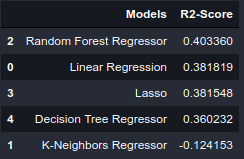


In [ ]:
#Importing required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import date 
import holidays 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#         break
    

In [ ]:
# Reading dataset
marketing_spent = pd.read_csv('/kaggle/input/google-store-ecommerce-data-fake-retail-data/Marketing_Spend.csv')
online = pd.read_csv('/kaggle/input/google-store-ecommerce-data-fake-retail-data/Online.csv')

In [ ]:
marketing_spent.head(2)

In [ ]:
online.head(2)

* Renaming columns as the Date column in names as "Unnamed" in marketing_spent csv file.
* Changing Date format in online csv file from YYYYMMDD to YYYY-MM-DD.

In [ ]:
marketing_spent.rename(columns = {'Unnamed: 0':'Date'}, inplace = True) 
marketing_spent['Date']= pd.to_datetime(marketing_spent['Date'])
online['Date'] = pd.to_datetime(online['Date'], format='%Y%m%d')

understanding Online dataset

In [ ]:
# understanding marketing spent dataset
print("Total number of rows:",online.shape[0])
print("Total number of colums:",online.shape[1])
print("\n\nList of columns:", online.columns.tolist())
print("\n\nDate Range:", online['Date'].min(), "to", online['Date'].max())
print("\n\nDatatypes:\n",online.dtypes)
print("\n\nUnique values:\n",online.nunique())
print("\n\nMissing values:\n",online.isnull().sum())
print("\n\nQuantitative analysis\n", online.describe())

We have 5 missing values for Quantity. Lets fill the same later.

Understanding marketing spent dataset

In [ ]:
# understanding marketing spent dataset
print("Total number of rows:",marketing_spent.shape[0])
print("Total number of colums:",marketing_spent.shape[1])
print("\n\nList of columns:", marketing_spent.columns.tolist())
print("\n\nDate Range:", marketing_spent['Date'].min(), "to", marketing_spent['Date'].max())
print("\n\nDatatypes:\n",marketing_spent.dtypes)
print("\n\nUnique values:\n",marketing_spent.nunique())
print("\n\nMissing values:\n",marketing_spent.isnull().sum())
print("\n\nQuantitative analysis\n", marketing_spent.describe())

# Combining Marketing Spend and Online dataset

In [ ]:
df = pd.merge(marketing_spent,online,left_on=['Date'],right_on=['Date'])
df.shape

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
# Missing values compution
df = df.fillna(axis=0, method='ffill')
df.head(2)

In [ ]:
df2 = df.copy()
df2 = df2[['Date', 'Quantity']]
print("Shape:",df2.shape,"\n")
print(df2.info(),"\n")
print("Missing values:\n",df2.isnull().sum())
print("\nDescription:\n", df2.describe())

We group by "Date" and sum up the "Quantities"

In [ ]:
df2 = df2.groupby(['Date'])['Quantity'].sum().reset_index()
df2.head()

In [ ]:
# extracting more features from the train dataset
df2['Year'] = pd.to_datetime(df2['Date']).dt.year
df2['Week'] = pd.to_datetime(df2['Date']).dt.week
df2['Day'] = pd.to_datetime(df2['Date']).dt.day
df2['Weekday'] = pd.to_datetime(df2['Date']).dt.dayofweek
df2.head(8)

In [ ]:
sns.boxplot(x=df2['Quantity'])

Lets plot some weekly

In [ ]:
# weekly trend
sns.lineplot(df2['Week'], df2['Quantity'])

# Removing Outliers

In [ ]:
# removing outliers
df2 = df2[df2['Quantity']<3000]
sns.boxplot(x=df2['Quantity'])

# Splitting the dataset

In [ ]:
#Breaking the data and selecting features , predictors
predictors=df2.drop(['Quantity','Date'],axis=1)
target=df2['Quantity']
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.1,random_state=7)

# Comparing Algorithms

In [ ]:
def scores(i):
    lin = i()
    lin.fit(x_train, y_train)
    y_pred=lin.predict(x_cv)
    lin_r= r2_score(y_cv, y_pred)
    s.append(lin_r)
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor]
s=[]
for i in algos:
    scores(i)

# Checking the score

In [ ]:
models = pd.DataFrame({
    'Models': ['Linear Regression', 'K-Neighbors Regressor', 
              'Random Forest Regressor', 'Lasso','Decision Tree Regressor'],
    'R2-Score': [s[0],s[1],s[2],s[3],s[4]]})
models.sort_values(by='R2-Score', ascending=False)

As we can see Random Forest Regressor will give the best R squared score for our dataset. As we have evaluated, let's run for Random Forest Regressor and see how it performs.

In [ ]:
#Hypertuned Model
model = RandomForestRegressor(oob_score=True,
                              n_jobs=1,
                              random_state=7,
                              max_features='auto',
                              min_samples_leaf=4)
# bootstrap=True, criterion='mse', max_depth=None,
#                       max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=4, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
#                       oob_score=True, random_state=7, verbose=0,
#                       warm_start=False
model.fit(x_train,y_train)

# R2 Score

In [ ]:
pred = model.predict(x_cv)
r2_score(pred, y_cv)

In [ ]:
def mean_percentage_error(y_cv, pred): 
    y_cv, pred = np.array(y_cv), np.array(pred)
    return np.mean(np.array((y_cv - pred) / y_cv)) * 100
mean_percentage_error(y_cv, pred)

# Test predict quantities for Jan 2018

In [ ]:
# creating testing data for 2018 Jan month
date_2018 = "2018-01-01"
# index = pd.date_range(date_2018, periods=30, freq='D')
#creating Quantity column
# columns = ['Quantity']
test = pd.DataFrame()
test['Date'] = pd.date_range(start=date_2018, periods=30, freq='D')
# # extracting more features from the train dataset
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['Weekday'] = pd.to_datetime(test['Date']).dt.dayofweek

test["Quantity"] = ""

test1=test.drop(['Quantity', 'Date'],axis=1)
pred2=model.predict(test1)
test['Random_Forest_Quantity_pred']=pred2.round(0)
test.head()

result=test[['Date','Random_Forest_Quantity_pred']]
result.head(30)